<b> Name </b>  : Dnyaneshwari Gavhane <br>
<b> Batch </b> : PGA-46 <br>
<b> Project </b>: Capstone Project - II <br>
<b> E-mail </b> : dnyaneshwarigavhane11@gmail.com 

<center>
    <h1>Real Time Face Mask Detection Using CNN</h1>
</center>    



### Problem Statement:
Developed a real-time face mask detection system using TensorFlow/Keras and OpenCV.
Build a convolutional neural network (CNN) model to classify faces as either wearing a mask or not. 

### Description: 
Trained a convolutional neural network (CNN) model to classify faces as either wearing a mask or 
not. Achieved accurate detection of face masks in live video streams from webcam inputs. Implemented a userfriendly interface to provide real-time feedback on mask-wearing status. The system helps promote public health 
and safety measures by identifying individuals not wearing masks.

### Importing Dependencies:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings(action='ignore')
from keras.models import load_model

### Importing Face Mask Dataset

In [4]:
path1=r"C:\archive (1)\data"       
cate=['with_mask','without_mask']

In [5]:
for i in cate:
    folders = os.path.join(path1 , i)
    print(folders)

C:\archive (1)\data\with_mask
C:\archive (1)\data\without_mask


#### Creating Labels for the two class of Images

with mask  -->  1

without mask  -->  0

In [6]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [7]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:
print('No.of with_mask label = ',len(with_mask_labels))
print('No.of without_mask label = ',len(without_mask_labels))

No.of with_mask label =  3725
No.of without_mask label =  3828


In [9]:
labels = with_mask_labels + without_mask_labels

print('Total no. of labels =',len(labels))
print(labels[0:5])
print(labels[-5:])

Total no. of labels = 7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### Displaying The Images

In [10]:
for i in cate:
    folders=os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        print(image_path)

C:\archive (1)\data\with_mask\with_mask_1.jpg
C:\archive (1)\data\with_mask\with_mask_10.jpg
C:\archive (1)\data\with_mask\with_mask_100.jpg
C:\archive (1)\data\with_mask\with_mask_1000.jpg
C:\archive (1)\data\with_mask\with_mask_1001.jpg
C:\archive (1)\data\with_mask\with_mask_1002.jpg
C:\archive (1)\data\with_mask\with_mask_1003.jpg
C:\archive (1)\data\with_mask\with_mask_1004.jpg
C:\archive (1)\data\with_mask\with_mask_1005.jpg
C:\archive (1)\data\with_mask\with_mask_1006.jpg
C:\archive (1)\data\with_mask\with_mask_1007.jpg
C:\archive (1)\data\with_mask\with_mask_1008.jpg
C:\archive (1)\data\with_mask\with_mask_1009.jpg
C:\archive (1)\data\with_mask\with_mask_101.jpg
C:\archive (1)\data\with_mask\with_mask_1010.jpg
C:\archive (1)\data\with_mask\with_mask_1011.jpg
C:\archive (1)\data\with_mask\with_mask_1012.jpg
C:\archive (1)\data\with_mask\with_mask_1013.jpg
C:\archive (1)\data\with_mask\with_mask_1014.jpg
C:\archive (1)\data\with_mask\with_mask_1015.jpg
C:\archive (1)\data\with_ma

C:\archive (1)\data\without_mask\without_mask_1.jpg
C:\archive (1)\data\without_mask\without_mask_10.jpg
C:\archive (1)\data\without_mask\without_mask_100.jpg
C:\archive (1)\data\without_mask\without_mask_1000.jpg
C:\archive (1)\data\without_mask\without_mask_1001.jpg
C:\archive (1)\data\without_mask\without_mask_1002.jpg
C:\archive (1)\data\without_mask\without_mask_1003.jpg
C:\archive (1)\data\without_mask\without_mask_1004.jpg
C:\archive (1)\data\without_mask\without_mask_1005.jpg
C:\archive (1)\data\without_mask\without_mask_1006.jpg
C:\archive (1)\data\without_mask\without_mask_1007.jpg
C:\archive (1)\data\without_mask\without_mask_1008.jpg
C:\archive (1)\data\without_mask\without_mask_1009.jpg
C:\archive (1)\data\without_mask\without_mask_101.jpg
C:\archive (1)\data\without_mask\without_mask_1010.jpg
C:\archive (1)\data\without_mask\without_mask_1011.jpg
C:\archive (1)\data\without_mask\without_mask_1012.jpg
C:\archive (1)\data\without_mask\without_mask_1013.jpg
C:\archive (1)\da

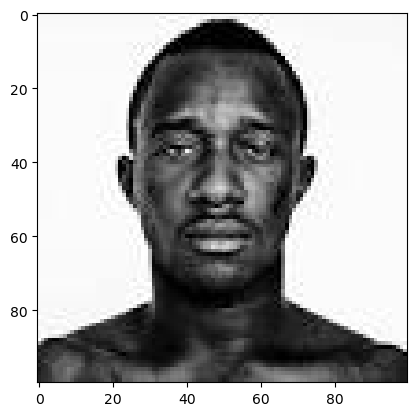

In [11]:
for i in cate:
    folders = os.path.join(path1 , i)
    for images in os.listdir(folders):
        image_path  = os.path.join(folders,images)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break 

### Image Processing

1. Resize the Images

2. Convert the images to numpy arrays

In [12]:
path1=r"C:\archive (1)\data"       
cate=['with_mask','without_mask']
image_size  = 200
input_image = []
for i in cate:
    folders = os.path.join(path1 , i)
    label   = cate.index(i) #we need to tell software which image is of mask & without mask.
    for images in os.listdir(folders):
        image_path  = os.path.join(folders,images)
        image_array = cv2.imread(image_path) #using the cv2 i'm reading image & storing in variable image
        image_array = cv2.resize(image_array , (image_size , image_size))#resizing each image 50*50
        input_image.append([image_array , label])

In [13]:
len(input_image)

7553

In [14]:
type(input_image)

list

In [15]:
input_image[0]

[array([[[34, 62, 56],
         [29, 54, 45],
         [36, 55, 46],
         ...,
         [ 8, 22, 18],
         [19, 43, 38],
         [18, 40, 33]],
 
        [[31, 57, 51],
         [30, 54, 45],
         [36, 57, 48],
         ...,
         [38, 49, 46],
         [10, 32, 24],
         [24, 43, 35]],
 
        [[29, 52, 47],
         [33, 56, 47],
         [38, 59, 50],
         ...,
         [58, 68, 62],
         [ 8, 26, 18],
         [33, 49, 38]],
 
        ...,
 
        [[34, 72, 59],
         [35, 71, 59],
         [39, 70, 61],
         ...,
         [12, 15, 16],
         [ 7,  9, 13],
         [ 7,  9, 13]],
 
        [[31, 72, 57],
         [35, 69, 56],
         [40, 67, 57],
         ...,
         [11, 12, 16],
         [12, 13, 17],
         [12, 12, 18]],
 
        [[27, 69, 52],
         [30, 65, 51],
         [37, 62, 52],
         ...,
         [14, 15, 19],
         [13, 13, 19],
         [13, 12, 21]]], dtype=uint8),
 0]

In [16]:
type(input_image [0])

list

### Sampling: Divide data into train and test

In [19]:
np.random.shuffle(input_image)

In [20]:
X = []
Y = []
for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [21]:
# converting image list and label list to numpy arrays

X = np.array(X)
Y = np.array(Y)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 200, 200, 3)
(7553,)


In [25]:
print(Y)

[0 1 0 ... 1 0 1]


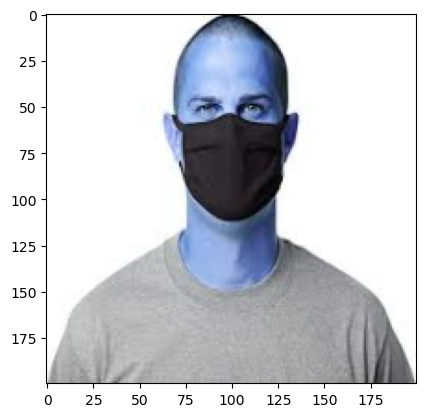

In [26]:
plt.imshow(X[0]) 

In [27]:
# Divide data into train & test

X_train = X[0:3000]
X_test = X[6026:7533]

Y_train = Y[0:3000]
Y_test = Y[6026:7533]

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 200, 200, 3) (3000, 200, 200, 3) (1507, 200, 200, 3)


In [29]:
#Scaling the data

X_train = X_train/255
X_test  = X_test/255

In [32]:
#X_train[0]

In [33]:
##X_test[0]

### Building a Convolutional Neural Networks (CNN)

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size =(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(filters =64, kernel_size = (3,3),activation = 'relu' ))
model.add(keras.layers.MaxPool2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128 , activation = 'relu' , input_shape = X.shape[1:])) #dense layer
model.add(Dropout(0.5))
          
model.add(keras.layers.Dense(64, activation='relu' , input_shape = X.shape[1:]))
model.add(keras.layers.Dropout(0.5))
          
model.add(Dense(num_of_classes, activation='softmax')) #Output layer

In [36]:
#Compile the Neural Network

adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [37]:
#Training the neural network

history = model.fit(X_train,Y_train ,validation_split=.2, batch_size = 128 , epochs = 10)

Epoch 1/10


19/19 [==============================] - 85s 4s/step - loss: 1.0335 - accuracy: 0.6333 - val_loss: 0.4497 - val_accuracy: 0.8317
Epoch 2/10
19/19 [==============================] - 67s 4s/step - loss: 0.4324 - accuracy: 0.8204 - val_loss: 0.3500 - val_accuracy: 0.8633
Epoch 3/10
19/19 [==============================] - 61s 3s/step - loss: 0.3308 - accuracy: 0.8829 - val_loss: 0.3213 - val_accuracy: 0.8717
Epoch 4/10
19/19 [==============================] - 56s 3s/step - loss: 0.2759 - accuracy: 0.8925 - val_loss: 0.3454 - val_accuracy: 0.8683
Epoch 5/10
19/19 [==============================] - 56s 3s/step - loss: 0.2389 - accuracy: 0.9033 - val_loss: 0.2938 - val_accuracy: 0.8833
Epoch 6/10
19/19 [==============================] - 56s 3s/step - loss: 0.1886 - accuracy: 0.9258 - val_loss: 0.3097 - val_accuracy: 0.8833
Epoch 7/10
19/19 [==============================] - 58s 3s/step - loss: 0.1581 - accuracy: 0.9417 - val_loss: 0.3093 - val_accuracy: 0.8933
Epoch 8/10
19/19 [

### Model Evalution:

In [38]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 9s 167ms/step - loss: 0.2942 - accuracy: 0.9137
Test Accuracy = 0.9137359261512756


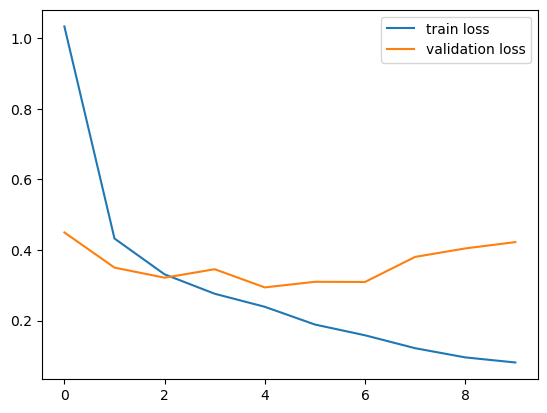

In [39]:
h = history

# plot the loss value

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

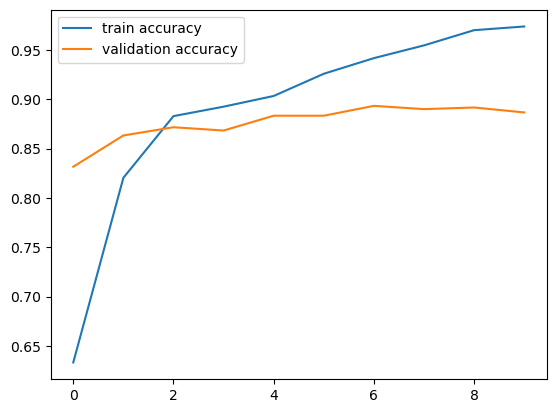

In [40]:
# plot the accuracy value

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

#### Save Model:

In [41]:
model.save('Face_mask_detection_LSTM.h5')

### Detection Using OpenCV:

In [42]:
def  face_extractor(img):
    faces = face_cascade.detectMultiScale(img, scaleFactor = 1.5 , minNeighbors = 5)
    if faces is ():
        return None
    
    
    for (x ,y , w, h)  in faces:
        cv2.rectangle(img , (x,y) , (x+w , y+h), (0,0, 255) , 2)
        roi =  img[y :y+h , x:x+w]
    
    return roi

In [43]:
face_cascade =  cv2.CascadeClassifier(r"C:\Neural Network\haarcascade_frontalface_default.xml")
model = load_model('Face_mask_detection_LSTM.h5')  # name of m y model---creted after CNN

video_capture =cv2.VideoCapture(0) # front camera
while True:
    ret,frame = video_capture.read()
    
    face = face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face , (200,200)) # based on the way u have build the cnn model
        im = Image.fromarray(face , 'RGB')
        
        
        img_array = np.array(im)
        
        img_array = np.expand_dims(img_array ,  axis = 0)
        pred = model.predict(img_array)
        print(pred)
        
        
        name = "None Matching"

        if pred[0][0]  > .5:
            name ="Masked"
        elif pred[0][1]  > .5:
            name = 'Mask is not there , Put on the mask' 
        cv2.putText(frame ,name , (75 , 75) , cv2.FONT_HERSHEY_COMPLEX , 1 , (255 , 0, 0) , 2)    
    else:
        cv2.putText(frame ,"Face not found" , (75 , 75 ) , cv2.FONT_HERSHEY_COMPLEX ,1 , (255 , 0, 0) , 2)
    cv2.imshow('Video' , frame)    
        
    if cv2.waitKey(20) & 0xff == ord('q') : 
        break
     
video_capture.release()
cv2.destroyAllWindows()     

1/1 [==============================] - 1s 971ms/step
[[0. 1.]]
1/1 [==============================] - 0s 68ms/step
[[0. 1.]]
1/1 [==============================] - 0s 74ms/step
[[0. 1.]]
1/1 [==============================] - 0s 50ms/step
[[0. 1.]]
1/1 [==============================] - 0s 63ms/step
[[0. 1.]]
1/1 [==============================] - 0s 73ms/step
[[0. 1.]]
1/1 [==============================] - 0s 58ms/step
[[0. 1.]]
1/1 [==============================] - 0s 71ms/step
[[0. 1.]]
1/1 [==============================] - 0s 52ms/step
[[0. 1.]]
1/1 [==============================] - 0s 48ms/step
[[0. 1.]]
1/1 [==============================] - 0s 50ms/step
[[0. 1.]]
1/1 [==============================] - 0s 56ms/step
[[0. 1.]]
1/1 [==============================] - 0s 58ms/step
[[0. 1.]]
1/1 [==============================] - 0s 56ms/step
[[0. 1.]]
1/1 [==============================] - 0s 49ms/step
[[0. 1.]]
1/1 [==============================] - 0s 43ms/step
[[0. 1.]]
1/1 [==

### Predictive System

Path of the image to be predicted: C:\archive (1)\data\with_mask\with_mask_780.jpg
1/1 [==============================] - 0s 69ms/step
[[9.9931276e-01 6.8721391e-04]]
0
The person in the image is wearing a mask


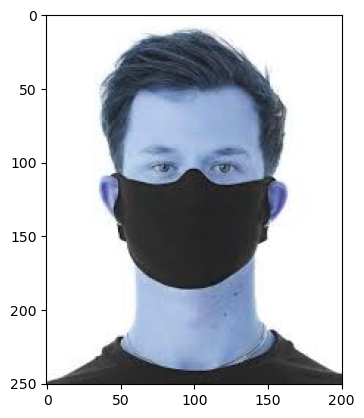

In [65]:
input_image_path = input('Path of the image to be predicted: ')

image_size  = 200

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (image_size , image_size))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,200,200,3])

input_prediction = model.predict(input_image_reshaped)


print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: C:\archive (1)\data\without_mask\without_mask_2558.jpg
1/1 [==============================] - 0s 73ms/step
[[2.0359911e-04 9.9979645e-01]]
1
The person in the image is not wearing a mask


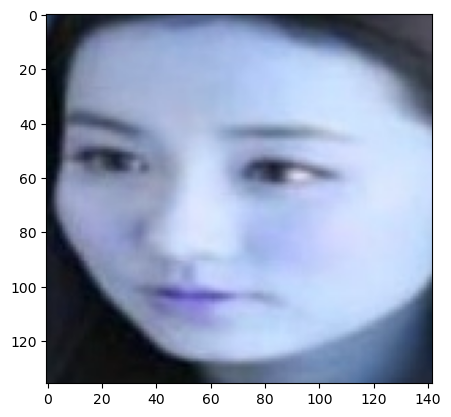

In [61]:
input_image_path = input('Path of the image to be predicted: ')
image_size = 200
input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (image_size,image_size))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,200,200,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')